<a href="https://colab.research.google.com/github/Stanley0918/TKU-AI-1110218/blob/main/%E3%80%8C%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import math
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2023-07-24 05:19:04--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-07-24 05:19:04--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-07-24 05:19:04--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [ ]:
stk = yf.Ticker('AAPL')
# 取得 2000 年至今的資料
df = stk.history(start = '2000-01-01')
# 簡化資料，只取開、高、低、收以及成交量
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
import pandas as pd
from talib import abstract

# 改成 TA-Lib 可以辨識的欄位名稱
df.columns = ['open','high','low','close','volume']
# 隨意試試看這幾個因子好了
ta_list = ['MACD','RSI','MA','STOCH']
# 快速計算與整理因子
for x in ta_list:
    output = eval('abstract.'+x+'(df)')
    output.name = x.lower() if type(output) == pd.core.series.Series else None
    df = pd.merge(df, pd.DataFrame(output), left_on = df.index, right_on = output.index)
    df = df.set_index('key_0')
print(df)

                                 open        high         low       close  \
key_0                                                                       
2000-01-03 00:00:00-05:00    0.795873    0.853737    0.771683    0.849469   
2000-01-04 00:00:00-05:00    0.821485    0.839508    0.767889    0.777850   
2000-01-05 00:00:00-05:00    0.787335    0.839034    0.781644    0.789232   
2000-01-06 00:00:00-05:00    0.805359    0.811999    0.720933    0.720933   
2000-01-07 00:00:00-05:00    0.732316    0.766466    0.724728    0.755083   
...                               ...         ...         ...         ...   
2023-07-17 00:00:00-04:00  191.899994  194.320007  191.809998  193.990005   
2023-07-18 00:00:00-04:00  193.350006  194.330002  192.419998  193.729996   
2023-07-19 00:00:00-04:00  193.100006  198.229996  192.649994  195.100006   
2023-07-20 00:00:00-04:00  195.089996  196.470001  192.500000  193.130005   
2023-07-21 00:00:00-04:00  194.100006  194.970001  191.229996  191.940002   

In [ ]:
#get number of rows and colums in the data set
df=df.dropna(axis=0)

In [ ]:
dataset=df.values
#Get the number of rows to train the model on
training_data_len=math.ceil( len(dataset)* .8)

training_data_len

4714

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df)

print(scaled_data)
scaled_data.shape

[[0.00345168 0.00341041 0.00336879 ... 0.00317199 0.43067834 0.62928196]
 [0.00327646 0.00347029 0.00320367 ... 0.00319122 0.44250664 0.51910789]
 [0.00339753 0.00354932 0.00337372 ... 0.00321608 0.51328065 0.46708633]
 ...
 [0.98978931 1.         1.         ... 0.99503521 0.83189391 0.86310904]
 [1.         0.99111248 0.99922064 ... 0.9974999  0.64626304 0.80817403]
 [0.99492034 0.98353786 0.99262174 ... 1.         0.37767868 0.63052417]]


(5892, 12)

In [ ]:
#create the traning data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00345168, 0.00327646, 0.00339753, 0.00355632, 0.00345898,
       0.00327646, 0.00341031, 0.003605  , 0.00393354, 0.00385079,
       0.0038946 , 0.00391163, 0.00377292, 0.00369504, 0.00372668,
       0.00374372, 0.00370842, 0.00349062, 0.00355632, 0.00366584,
       0.00379725, 0.00376075, 0.00415865, 0.00451761, 0.00453465,
       0.00434726, 0.00433265, 0.0044154 , 0.00418907, 0.00395057,
       0.00426451, 0.00415256, 0.00391285, 0.00407469, 0.00394327,
       0.00411606, 0.00379726, 0.00362203, 0.00333   , 0.00324482,
       0.00325212, 0.00379725, 0.0039019 , 0.00380456, 0.00346628,
       0.00374372, 0.00391893, 0.00355146, 0.00393841, 0.00385079,
       0.00378752, 0.0036196 , 0.00347115, 0.00330322, 0.00335311,
       0.00328376, 0.00304039, 0.00293575, 0.00311584, 0.00319615])]
[0.003058035960887916]

[array([0.00345168, 0.00327646, 0.00339753, 0.00355632, 0.00345898,
       0.00327646, 0.00341031, 0.003605  , 0.00393354, 0.00385079,
       0.0038946 , 0.00391163, 0.0

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [29]:
x_train,y_train

(array([[[0.00345168],
         [0.00327646],
         [0.00339753],
         ...,
         [0.00293575],
         [0.00311584],
         [0.00319615]],
 
        [[0.00327646],
         [0.00339753],
         [0.00355632],
         ...,
         [0.00311584],
         [0.00319615],
         [0.00305804]],
 
        [[0.00339753],
         [0.00355632],
         [0.00345898],
         ...,
         [0.00319615],
         [0.00305804],
         [0.00302336]],
 
        ...,
 
        [[0.25637038],
         [0.25948276],
         [0.2615618 ],
         ...,
         [0.25031776],
         [0.24738992],
         [0.2523722 ]],
 
        [[0.25948276],
         [0.2615618 ],
         [0.2672945 ],
         ...,
         [0.24738992],
         [0.2523722 ],
         [0.25820664]],
 
        [[0.2615618 ],
         [0.2672945 ],
         [0.26569528],
         ...,
         [0.2523722 ],
         [0.25820664],
         [0.25273782]]]),
 array([0.00305804, 0.00302336, 0.00299902, ..., 0.2582

In [ ]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4654, 60, 1)

In [30]:
x_train.shape

(4654, 60, 1)

#Reshape the data


In [ ]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the data
model.fit(x_train,y_train,batch_size=1,epochs=1)

4654/4654 [==============================] - 153s 32ms/step - loss: 7.8440e-05


In [ ]:
#Create a testing data set
test_data=scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
scaled_data.shape

(5892, 12)

In [ ]:
#Convert the data to a nparray
x_test=np.array(x_test)

In [22]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [34]:
x_test.shape

(1178, 60, 1)

In [31]:
#Get the models predicted price values
predictions=model.predict(x_test)
print(type(predictions))


37/37 [==============================] - 1s 18ms/step
<class 'numpy.ndarray'>


In [32]:
predictions=scaler.inverse_transform(predictions)

ValueError: ignored

In [ ]:
predictions = model.predict(x_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

37/37 [==============================] - 1s 14ms/step


ValueError: ignored

In [ ]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean( predictions -y_test )**2)
rmse

9013501.911774553

<ipython-input-44-3d156562a264>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


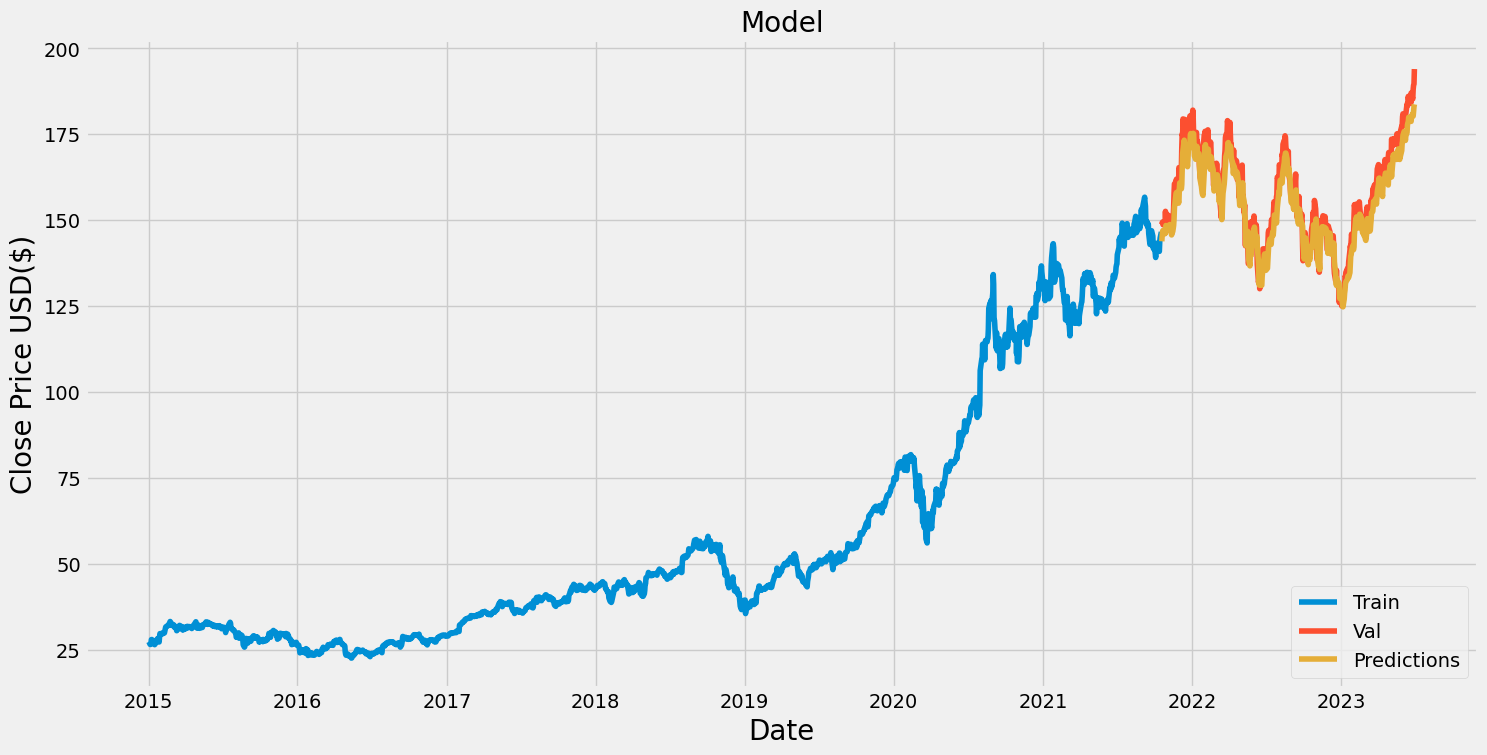

In [ ]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price USD($)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()